In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from simulator import simulator

In [2]:
x0 = torch.tensor([0, 0])
v0 = torch.tensor([10, 10])

x = torch.cat((x0, v0))
print(x)

tensor([ 0,  0, 10, 10])


In [3]:
b = simulator(x, t=3)
print(b)

tensor([ 30.0000, -14.1450,  10.0000, -19.4300])


## $\arg \min_x ||A(x) - b||_2^2$

In [4]:
x = torch.tensor([0., 0., 0., 0.], requires_grad=True)
optimizer = torch.optim.SGD({x}, lr=1e-4)

training_loss = []
for epoch in range(10000):
    
    Ax = simulator(x, t=3)
    loss = ((Ax - b)**2).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())

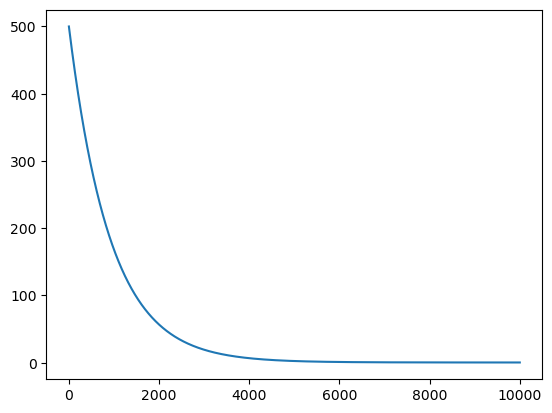

In [5]:
plt.plot(training_loss)